In [4]:
##complex data와 똑같이 40ms로 parsing했음 데이터 4배라고 생각하고 뻥튀기시켜봄 정확도는 10ms와 비슷하게 나옴

import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import svm
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import glob


#filename queue
filename_queue=glob.glob('./rawdata/data[1-4].csv')
#Create return path
#return_path='./parsed/data.csv'
#create_file=open(return_path,'w')

In [15]:
#Parsing data

training_set=[]
test_set=[]
training_label=[]
test_label=[]
X=[]
y=[]
label_count=np.zeros(16)

#return_file=open(return_path,'a')
#writer=csv.writer(return_file)
#writer.writerow()
n_data=[]

for filename in filename_queue:
    file=open(filename, newline='')
    
    reader=csv.reader(file)
    header=next(reader)
    
    for row in reader:
        row[4:]=[float(i) for i in row[4:]]
        date=datetime.strptime(row[0],'%Y/%m/%d')
        msec=row[1:3]
        labl=int(row[3])
        label_count[labl]+=1
        for x in range(4):
            X_acc=list(row[4*i+4+x] for i in range(150))
            Y_acc=list(row[4*i+604+x] for i in range(150))
            Z_acc=list(row[4*i+1204+x] for i in range(150))
            X_gyro=list(row[4*i+1804+x] for i in range(150))
            Y_gyro=list(row[4*i+2404+x] for i in range(150))
            Z_gyro=list(row[4*i+3004+x] for i in range(150))
        
            window=np.array([[X_acc[0:25],X_acc[25:50],X_acc[50:75],X_acc[75:100],X_acc[100:125],X_acc[125:150]],
                [Y_acc[0:25],Y_acc[25:50],Y_acc[50:75],Y_acc[75:100],Y_acc[100:125],Y_acc[125:150]],
                [Z_acc[0:25],Z_acc[25:50],Z_acc[50:75],Z_acc[75:100],Z_acc[100:125],Z_acc[125:150]],
                [X_gyro[0:25],X_gyro[25:50],X_gyro[50:75],X_gyro[75:100],X_gyro[100:125],X_gyro[125:150]],
                [Y_gyro[0:25],Y_gyro[25:50],Y_gyro[50:75],Y_gyro[75:100],Y_gyro[100:125],Y_gyro[125:150]],
                [Z_gyro[0:25],Z_gyro[25:50],Z_gyro[50:75],Z_gyro[75:100],Z_gyro[100:125],Z_gyro[125:150]]])
    
            #5 features  what else?2
            window_mean=window.mean(axis=-1)
            window_stddev=window.std(axis=-1)
            window_median=np.median(window,axis=-1)
            window_percent25=np.percentile(window,25,axis=-1)
            window_percent75=np.percentile(window,75,axis=-1)

            window_feature=np.array([[window_mean],[window_stddev],[window_median],[window_percent25],[window_percent75]])
            window_feature=window_feature.reshape(180)
            
            #for cross validation
            X.append(window_feature)
            y.append(labl)
            #수동으로 X, y 나누기
            if (label_count[labl]%5!=1):
                training_set.append(window_feature)
                training_label.append(labl)
            else:
                test_set.append(window_feature)
                test_label.append(labl)
        

In [17]:
print(y)

[12, 12, 12, 12, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 7, 7, 7, 7, 3, 3, 3

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(scores.mean())


#test_pred3=clf.predict(test_set)
#print(accuracy_score(test_pred3,test_label))
#print(confusion_matrix(test_pred3, test_label))
#onehot_pred3=test_pred2.reshape(-1,1)
#onehot_pred3=ohc.fit_transform(onehot_pred3).toarray()
#print(onehot_pred3)

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.6479090234052387


In [22]:
k_range=range(1,31)
k_scores=[]
for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: 

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.7146387114616719, 0.699109953098599, 0.6908849513937824, 0.6760492388940664, 0.6479090234052387, 0.6378362845604225, 0.6311223755294403, 0.6198752642465847, 0.6426113055864949, 0.6377127990059026, 0.6337981421286719, 0.6246635828427249, 0.6237138863000933, 0.6236935610968412, 0.6160601118359741, 0.6143460702081391, 0.6025530955682343, 0.6028909334060722, 0.5951444926844423, 0.5952221565552096, 0.5900228256010427, 0.5832346244478288, 0.5746512134506248, 0.5740982466907615, 0.569199740110169, 0.5683107539835882, 0.553762378863304, 0.5496953871449246, 0.5444740451132378, 0.5428581251562749]


Text(0, 0.5, 'accuracy')

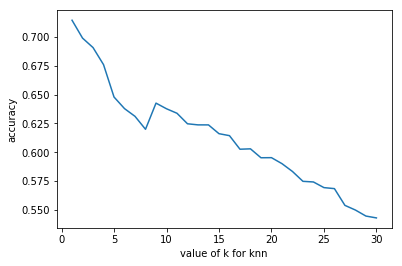

In [23]:
plt.plot(k_range,k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy')

In [25]:
from sklearn.model_selection import GridSearchCV

k_range=range(1,31)
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [33]:
grid.fit(X,y)

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [39]:
(grid.cv_results_)

{'mean_fit_time': array([0.0053582 , 0.00353742, 0.00355356, 0.0035985 , 0.00354288,
        0.0035614 , 0.00353668, 0.00350273, 0.00377796, 0.00353215,
        0.00386388, 0.00382466, 0.00420527, 0.00407178, 0.00412288,
        0.00351868, 0.0035301 , 0.00347745, 0.00352192, 0.00371614,
        0.00375547, 0.00350671, 0.00372357, 0.00351775, 0.00355906,
        0.00354428, 0.00348735, 0.00352111, 0.00348401, 0.00353732]),
 'std_fit_time': array([5.17720865e-03, 1.54642488e-04, 7.17618576e-05, 1.77289819e-04,
        9.95433658e-05, 1.45699511e-04, 1.36926571e-04, 2.97299938e-05,
        8.46533148e-04, 6.96428342e-05, 7.03988322e-04, 6.36842542e-04,
        9.01798840e-04, 9.67725335e-04, 1.13464301e-03, 5.00483929e-05,
        5.01388150e-05, 3.30998927e-05, 5.25387135e-05, 6.65359613e-04,
        6.18111165e-04, 3.02086407e-05, 4.44145207e-04, 4.09814075e-05,
        1.02736046e-04, 6.83006439e-05, 4.93803960e-05, 6.46207775e-05,
        2.75488516e-05, 4.88304533e-05]),
 'mean_scor

In [ ]:
scores=cross_val_score(KNeighborsClassifier(1),X,y,cv=10,scoring='accuracy')


In [146]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
param_grid={
 'n_estimators':[80],
   # 'max_features':['auto','sqrt','log2'],
    'max_depth':[10,11,12,13,14,None]
    #'criterion':['gini','entropy']
}

grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=10,scoring='accuracy')

In [147]:
grid.fit(X,y)

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [148]:
grid.cv_results_

{'mean_fit_time': array([0.47282453, 0.47532389, 0.46531811, 0.48848743, 0.51710432,
        0.47345588]),
 'std_fit_time': array([0.02353153, 0.02712695, 0.0072558 , 0.02477915, 0.04259611,
        0.01305637]),
 'mean_score_time': array([0.00563154, 0.00526221, 0.0052773 , 0.00599732, 0.00642779,
        0.00571854]),
 'std_score_time': array([9.92028429e-04, 5.73451006e-05, 6.37734893e-05, 1.13566525e-03,
        1.59951105e-03, 1.32041009e-03]),
 'param_max_depth': masked_array(data=[10, 11, 12, 13, 14, None],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[80, 80, 80, 80, 80, 80],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10, 'n_estimators': 80},
  {'max_depth': 11, 'n_estimators': 80},
  {'max_depth': 12, 'n_estimators': 80},
  {'max_depth': 13, 'n_estimators': 80},
  {'max_d

In [149]:
grid.best_params_

{'max_depth': 13, 'n_estimators': 80}

In [150]:
clf1=RandomForestClassifier(80)
scores=cross_val_score(clf1,X,y,cv=10,scoring='accuracy')
print(scores.mean())

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.8624162556164239


In [151]:
#SVM
#prepare the data
#prepare the model
clf = sklearn.svm.SVC(gamma='scale',tol=0.1)
scores=cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(scores.mean())


/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.7578969002644359


In [171]:
param_grid={
 #'kernel':['linear','poly','rbf','sigmoid'], rbf to be best acc
    'C':[0.001,0.01,0.1,1,10],
#    'gamma' : [0.001, 0.01, 0.1, 1]

}

grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=10,scoring='accuracy')

In [172]:
grid.fit(X,y)

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.1, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [173]:
grid.best_params_

{'C': 10}

In [174]:
grid.cv_results_

{'mean_fit_time': array([0.36562347, 0.3576674 , 0.33173978, 0.15177834, 0.11077726]),
 'std_fit_time': array([0.02680543, 0.00289398, 0.00228093, 0.00326965, 0.00157215]),
 'mean_score_time': array([0.02880199, 0.02901666, 0.02841318, 0.02233956, 0.01929898]),
 'std_score_time': array([0.00090188, 0.0009759 , 0.00082091, 0.00100522, 0.00085786]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.20325203, 0.20325203, 0.57723577, 0.7398374 , 0.69918699]),
 'split1_test_score': array([0.20325203, 0.20325203, 0.55284553, 0.82926829, 0.79674797]),
 'split2_test_score': array([0.20833333, 0.20833333, 0.55833333, 0.85      , 0.85833333]),
 'split3_test_score': array([0.20833333, 0.20833333, 0.575     , 0.81666667, 0.78333333]),
 'split4_test_score': array([0.21551724, 0.21551

In [176]:
clf1=sklearn.svm.SVC(gamma='scale',tol=0.1)
scores=cross_val_score(clf1,X,y,cv=10,scoring='accuracy')
print(scores.mean())

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.7578969002644359
